# <b><span style='color:#6588d8'> Crossfit Games - Data Analysis & Predictions</b>
![](https://images.unsplash.com/photo-1604247584233-99c80a8aae2c?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2920&q=80)

## Quick summary

### Objective was: 
Exploring this Crossfit Games/Open Kaggle dataset, understanding which specific features might influence the most the overall ranking, and see if we could build a simple model to estimate <b>ranks for years 2020 to 2023</b>, based on those features & previous years results.

### Outcome is:
| Year    | Mean abs error on Ranks  | % Mean abs error based on max Rank |
| ------- |:----:| -----------------------:|
| 2020    | ~6.3 | ~21%                    |
| 2021    | ~5.1 | ~13%                    |
| 2022    | ~6.1 | ~16%                    |
| 2023    | ~6.4 | ~16%                    |    
| **Overall** | **~6** | **~16.5%**                        |

Additional KPIs:
* Data quality: 
    * Data for <b>years older than 2011 is less exhaustive</b>, does not contain country of origin nor affiliate name for example.
* <b>2019</b> is the year having the highest number of athletes & highest number of different countries by far.
* Fittest men & women: <b>Mathew Fraser won 5 </b>Games competitions consecutively, <b>Tia-Clair Toomey 6</b>.
* The proportion of US athletes in the Games keeps dropping YoY, with a huge drop in 2019. It is now getting close to <b>40% of competing Games athletes (2022)</b>, compared to more than <b>80% in 2012</b>. This can be explained by Crossfit increasing its popularity & influence around the world!
* Almost <b>9 out of 10</b> athletes were in the <b>18-35</b> age group across the measured period.

We would definitely need more relevant data to provide more accurate & insightful predictions. This was an interesting 1st step, and it could lead to further thorough analysis including additional data around Crossfit & athletes performance. Please check the "Next steps" for more details!

## Analysis Outline

### [1. Objective](#obj)
   #### * [What is it about?](#wiia)
   #### * [What is our goal in this notebook?](#wiogitn)
   
### [2. Preparing the data](#cleaning)

### [3. EDA: Exploratory Data Analysis](#eda)
   #### * [Prediction Target](#target)
   #### * [Features Selection](#feature)
   
### [4. Modelling](#modelling)
   
### [5. Next Steps](#next)

# <b>1 <span style='color:#6588d8'>|</span><a id="obj"> Objective</a></b>
    
##    * <a id="wiia">What is it about?</a>
The dataset is about Crossfit Games & Open, containing data for the main athletes from 2011 up to 2023 (Open) & from 2007 to 2023 (Games).  <br>
### OPEN
Open is a worldwide competition, where athletes from all Crossfit affiliates can join. They will measure themselves with other Crossfitters from the same categories (age bracket, gender, Rx/Inter/Scale). The best scores can qualify for the Games.  <br>
### QUARTERFINALS
It is important to note that rules to be eligible to participate in the Games surely have changed throughout the measured period. As of today, 10% of the best athletes from Open (for each region, gender and age group) can move to Quarterfinals, which is also a "virtual" competition where athletes submit their score/recording of the workouts as a proof.<br>
### SEMIFINALS
The best athletes from the Quarterfinals can move to the Semifinals, which is an in-person competition. 30 to 60 qualifiers depending on the region, across the best men, women for each age group. <br>
### GAMES
Games are top-level in-person Fitness competitions, with the best Crossfitters from all around the world. There is a threshold of participants depending on the region, chosen from the pool of Semifinals best performers.
    
##    * <a id="wiogitn">What is our goal in this notebook?</a>
-The objective of this analysis is to gain insights into the accomplishments of Crossfit athletes during the Games, throughout the measured years.  <br><br>
-Will we identify common patterns & relationships in the data?  <br><br>
-Will we somehow be able to predict the overall ranking for years 2020 to 2023 with this curated set of features & historical data?
  
### <b><span style='color:#6588d8'>Warm up's over, let's begin our Analysis of the Day 🏋️.</span></b>

# <b>2 <span style='color:#6588d8'>|</span><a id="cleaning"> Preparing the data</a></b>
Let's start by importing the Crossfit dataset into a dataframe:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb

# Establishing a connection to DuckDB
db_path = "/app/db/crossfit_analysis.duckdb"
conn = duckdb.connect(db_path)

# Reading from the DuckDB table
query = "SELECT * FROM df_games_and_open_with_2023"
crossfit_data = pd.read_sql_query(query, conn)

# Closing the connection
conn.close()

IOException: IO Error: Cannot open file "/app/db/crossfit_analysis.duckdb": Permission denied

For the purpose of this analysis, we will not only use python but also SQL queries, directly on our dataframes.

Now, let's do a high level exploration of the Crossfit dataset:

In [3]:
# "Schema" of our dataframe
crossfit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713 entries, 0 to 1712
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   competitorId         1713 non-null   int64  
 1   competitorName       1713 non-null   object 
 2   firstName            1713 non-null   object 
 3   lastName             1712 non-null   object 
 4   gender               1713 non-null   object 
 5   genderId             1713 non-null   int64  
 6   age                  1713 non-null   int64  
 7   ageNull              1713 non-null   int64  
 8   height               1713 non-null   float64
 9   heightNull           1713 non-null   int64  
 10  weight               1713 non-null   float64
 11  weightNull           1713 non-null   int64  
 12  bmi                  1713 non-null   float64
 13  bmiNull              1713 non-null   int64  
 14  affiliateName        912 non-null    object 
 15  affiliateId          1713 non-null   i

In [4]:
# Checking null values across the different columns
crossfit_data.isnull().sum()

competitorId             0
competitorName           0
firstName                0
lastName                 1
gender                   0
genderId                 0
age                      0
ageNull                  0
height                   0
heightNull               0
weight                   0
weightNull               0
bmi                      0
bmiNull                  0
affiliateName          801
affiliateId              0
countryOfOriginName    493
countryOfOriginCode      0
regionName             455
regionId                 0
status                   0
statusId                 0
year                     0
overallRank              0
overallScore             0
openCompetitor           0
openRank                 0
openScore                0
gamesCompetitions        0
openCompetitions         0
dtype: int64

Let's investigate the columns with empty values!

### lastName

In [5]:
# Who's the athlete with the missing last name?
duckdb.sql("SELECT competitorId, competitorName, firstName, gender, overallRank, year FROM crossfit_data WHERE lastName IS NULL")

┌──────────────┬────────────────┬───────────┬─────────┬─────────────┬───────┐
│ competitorId │ competitorName │ firstName │ gender  │ overallRank │ year  │
│    int64     │    varchar     │  varchar  │ varchar │    int64    │ int64 │
├──────────────┼────────────────┼───────────┼─────────┼─────────────┼───────┤
│      2377152 │ Victoria       │ Victoria  │ F       │          20 │  2007 │
└──────────────┴────────────────┴───────────┴─────────┴─────────────┴───────┘

In [6]:
# Can we identify the last name elsewhere in the dataset?
duckdb.sql("SELECT competitorId, competitorName, firstName, gender, overallRank, year FROM crossfit_data WHERE competitorId = '2377152'")
# We don't see this athlete appearing elsewhere in the dataset.

┌──────────────┬────────────────┬───────────┬─────────┬─────────────┬───────┐
│ competitorId │ competitorName │ firstName │ gender  │ overallRank │ year  │
│    int64     │    varchar     │  varchar  │ varchar │    int64    │ int64 │
├──────────────┼────────────────┼───────────┼─────────┼─────────────┼───────┤
│      2377152 │ Victoria       │ Victoria  │ F       │          20 │  2007 │
└──────────────┴────────────────┴───────────┴─────────┴─────────────┴───────┘

### affiliateName

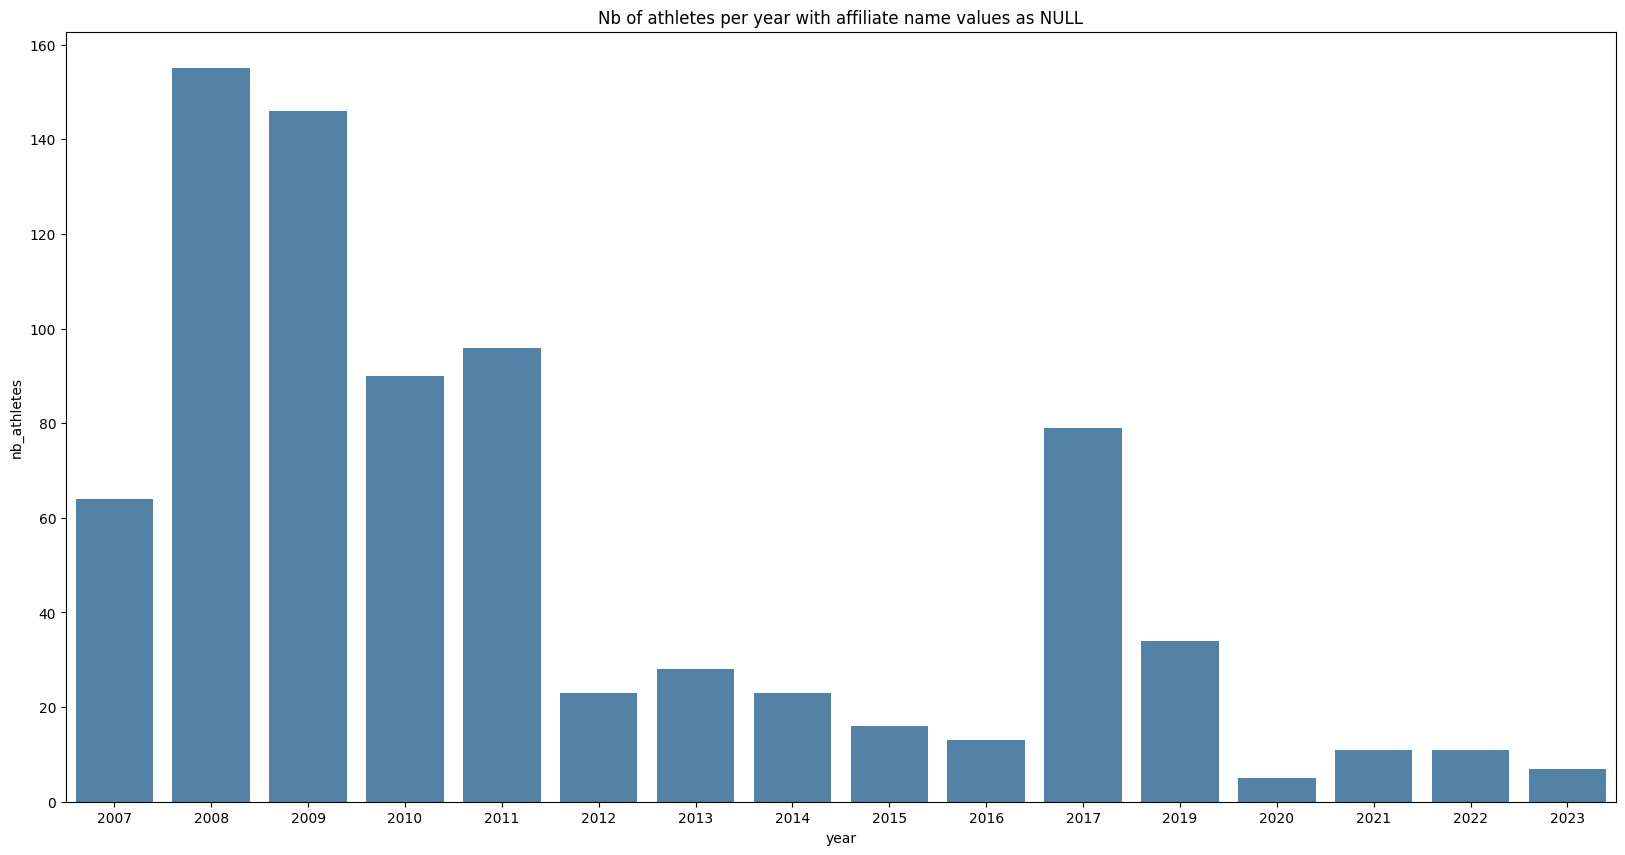

In [7]:
# Let's see the distribution of affiliateName empty values across the measured period.
empty_affiliates = duckdb.sql("WITH emptyAffiliateName AS (SELECT competitorId, affiliateName, year FROM crossfit_data WHERE affiliateName IS NULL) SELECT COUNT(DISTINCT competitorId) AS nb_athletes, year FROM emptyAffiliateName GROUP BY year ORDER BY year DESC").df()
sns.barplot(data=empty_affiliates, x="year", y="nb_athletes", color="steelblue")
plt.title("Nb of athletes per year with affiliate name values as NULL")
plt.gcf().set_size_inches(20,10)
# We can see that most empty values are seen before 2012.

Now, as most empty values are from <b>older years (> 2012)</b>, we will try to see if this data if available per athlete during later years. If so, then we will use it to populate those empty values, and enhance the quality of our dataset for prediction.


>Wait, aren't we <b>"contaminating"</b> our dataset with recent values on older years for those athletes? (i.e data leakage)

We are taking an <b>assumption</b> that the same athlete stayed in the same affiliate for Games participation throughout the measured period. Of course, this is not necessarily true, but we assume it should be in most cases.
<br>Furthermore, we are taking the <b>oldest</b> existing value into account, to reduce the likeliness of the athlete having another affiliate (or country/region as we will see below)

In [8]:
def replaceEmptyValues(Id, value, sorting_column, df):
    """
    Replacing empty values with values matching the ID elsewhere in the dataframe
    Example: User ID 1 has an empty value in Country column for Year 2020. Country column = NaN
    User ID 1 however has a value in Country column starting from Year 2021. Country column = Ireland
    
    This function will replace the Country NaN value in 2020 for User ID 1 with "Ireland"
    
    Specific case: User ID 1 moved, and has Country column = Greece in 2022.
    Here, we will take the oldest value, by sorting the dataframe with the "sorting_column" ascending.
    
    This function will hence replace the Country NaN value in 2020 for User ID 1 with "Ireland" still
    """
    # Sort the DataFrame by 'year' in ascending order
    sorted_df = df.sort_values(by=sorting_column, ascending=True)
    # Create a mapping of competitorId to non-empty affiliateName 
    value_mapping = df.dropna().set_index(Id)[value].to_dict()
    # Replace empty values with the actual affiliateName
    df[value] = df[value].fillna(df[Id].map(value_mapping))
    
def replace0Values(Id, value, sorting_column, df):
    """
    Replacing values == 0 with values matching the ID elsewhere in the dataframe
    Example: User ID 1 has its Country ID column for Year 2020 == 0
    User ID 1 however has a value in Country column starting from Year 2021. Country ID column = 10
    
    This function will replace the Country ID 0 value in 2020 for User ID 1 with 10
    
    Specific case: User ID 1 moved, and has Country ID column = 23 in 2022.
    Here, we will take the oldest value, by sorting the dataframe with the "sorting_column" ascending.
    
    This function will hence replace the Country ID 0 value in 2020 for User ID 1 with 10 still
    """
    # Sort the DataFrame by 'year' in ascending order
    sorted_df = df.sort_values(by=sorting_column, ascending=True)
    # Create a mapping of competitorId to affiliateId != 0 (which means a non-empty affiliateName)
    value_mapping = df[df[value] != 0].set_index(Id)[value].to_dict()
    # Replace zeros using the mapping for affiliateId
    mask = df[value] == 0
    # Further filter to consider only rows where the competitorId has an entry in the value_mapping_affId
    valid_ids = df.loc[mask, Id].isin(value_mapping.keys())
    filtered_mask = mask & valid_ids
    df.loc[filtered_mask, value] = df.loc[filtered_mask, Id].map(value_mapping)

# Modifying affiliateName
replaceEmptyValues("competitorId", "affiliateName", "year", crossfit_data)
# Modifying affiliateId
replace0Values("competitorId", "affiliateId", "year", crossfit_data)

In [9]:
# Checking null values across the different columns
crossfit_data.isnull().sum()

competitorId             0
competitorName           0
firstName                0
lastName                 1
gender                   0
genderId                 0
age                      0
ageNull                  0
height                   0
heightNull               0
weight                   0
weightNull               0
bmi                      0
bmiNull                  0
affiliateName          567
affiliateId              0
countryOfOriginName    493
countryOfOriginCode      0
regionName             455
regionId                 0
status                   0
statusId                 0
year                     0
overallRank              0
overallScore             0
openCompetitor           0
openRank                 0
openScore                0
gamesCompetitions        0
openCompetitions         0
dtype: int64

We've managed to:
* Reduce the number of empty affiliateName (& henceforth "0" affiliateId) from <b>801 to 567, a ~29%</b> reduction.

### countryOfOriginName

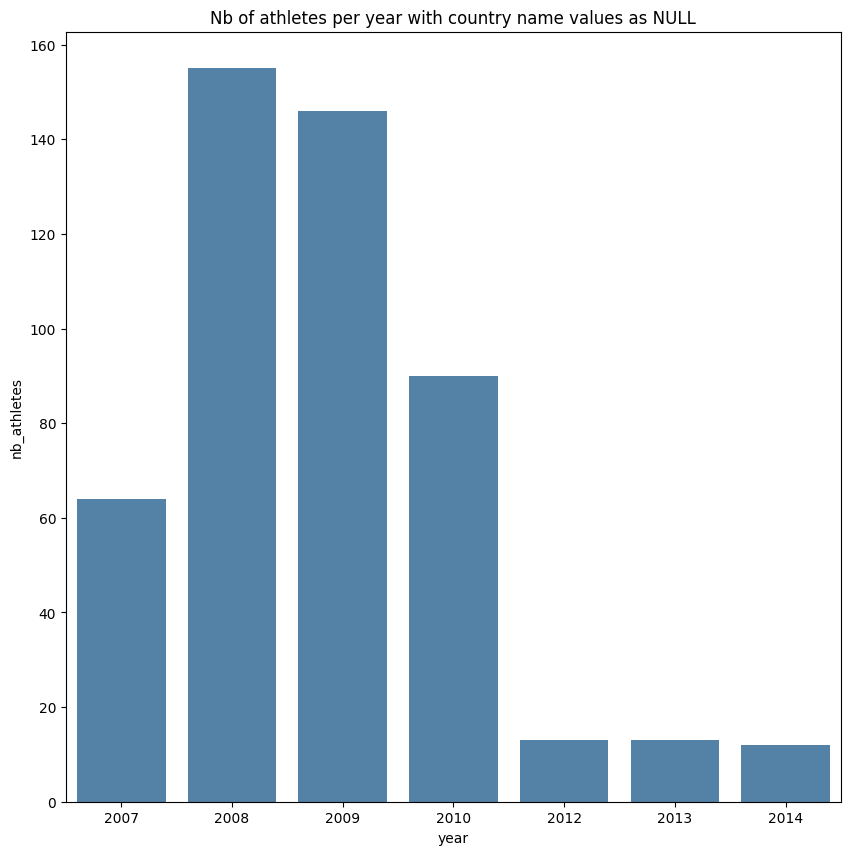

In [10]:
# Let's see the distribution of countryOfOriginName empty values across the measured period.
empty_country = duckdb.sql("WITH emptyCountryName AS (SELECT competitorId, countryOfOriginName, year FROM crossfit_data WHERE countryOfOriginName IS NULL) SELECT COUNT(DISTINCT competitorId) AS nb_athletes, year FROM emptyCountryName GROUP BY year ORDER BY year DESC").df()
sns.barplot(data=empty_country, x="year", y="nb_athletes", color="steelblue")
plt.title("Nb of athletes per year with country name values as NULL")
plt.gcf().set_size_inches(10,10)
# All empty values are before 2015.

Let's use the same functions as we previously did for affiliateName & affiliateId, taking into account the most recent Country name/Id value for the athletes with missing values.
> Any risk of <b>data leakage</b> here?

Same assumption as with affiliateName above.

In [11]:
# Modifying countryOfOriginName
replaceEmptyValues("competitorId", "countryOfOriginName", "year", crossfit_data)
# Modifying countryOfOriginCode
replace0Values("competitorId", "countryOfOriginCode", "year", crossfit_data)

In [12]:
# Checking null values across the different columns
crossfit_data.isnull().sum()

competitorId             0
competitorName           0
firstName                0
lastName                 1
gender                   0
genderId                 0
age                      0
ageNull                  0
height                   0
heightNull               0
weight                   0
weightNull               0
bmi                      0
bmiNull                  0
affiliateName          567
affiliateId              0
countryOfOriginName    423
countryOfOriginCode      0
regionName             455
regionId                 0
status                   0
statusId                 0
year                     0
overallRank              0
overallScore             0
openCompetitor           0
openRank                 0
openScore                0
gamesCompetitions        0
openCompetitions         0
dtype: int64

We've managed to:
* Reduce the number of empty countryOfOriginName (& henceforth "0" countryOfOriginCode) from <b>493 to 423, a ~14%</b> reduction.

### regionName

Let's use the same functions as we previously did for regionName & regionId, taking into account the most recent Region name/Id value for the athletes with missing values.
> Any risk of <b>data leakage</b> here?

Same assumption as with affiliateName above.

In [13]:
# Modifying regionName
replaceEmptyValues("competitorId", "regionName", "year", crossfit_data)
# Modifying regionId
replace0Values("competitorId", "regionId", "year", crossfit_data)

In [14]:
# Checking null values across the different columns
crossfit_data.isnull().sum()

competitorId             0
competitorName           0
firstName                0
lastName                 1
gender                   0
genderId                 0
age                      0
ageNull                  0
height                   0
heightNull               0
weight                   0
weightNull               0
bmi                      0
bmiNull                  0
affiliateName          567
affiliateId              0
countryOfOriginName    423
countryOfOriginCode      0
regionName             398
regionId                 0
status                   0
statusId                 0
year                     0
overallRank              0
overallScore             0
openCompetitor           0
openRank                 0
openScore                0
gamesCompetitions        0
openCompetitions         0
dtype: int64

We've managed to:
* Reduce the number of empty regionName (& henceforth "0" regionId) from <b>455 to 398, a ~12.5%</b> reduction.

In [15]:
## Summary of the data
crossfit_data.describe()

,competitorId,genderId,age,ageNull,height,heightNull,weight,weightNull,bmi,bmiNull,...,regionId,statusId,year,overallRank,overallScore,openCompetitor,openRank,openScore,gamesCompetitions,openCompetitions
count,1.713000e+03,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,...,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000,1713.000000
mean,3.356736e+05,1.462931,27.841798,0.044950,171.821777,0.098657,77.862459,0.095738,26.198872,0.104495,...,1.968476,2.264448,2014.830706,32.477525,332.767659,0.716871,412.933450,2564.793929,1.973147,2.211325
std,5.677622e+05,0.498770,4.529378,0.207256,8.482113,0.298288,13.000982,0.294318,2.673508,0.305991,...,2.114190,1.458380,4.887096,28.504441,296.148708,0.450650,444.719164,2061.577580,1.798358,1.856018
min,1.616000e+03,1.000000,13.000000,0.000000,150.000000,0.000000,50.000000,0.000000,15.656170,0.000000,...,0.000000,1.000000,2007.000000,-1.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000
25%,1.697300e+04,1.000000,25.000000,0.000000,165.374825,0.000000,65.666667,0.000000,24.014146,0.000000,...,1.000000,1.000000,2010.000000,13.000000,71.000000,0.000000,29.000000,576.000000,1.000000,1.000000
50%,8.161600e+04,1.000000,27.000000,0.000000,171.000000,0.000000,80.000000,0.000000,26.233556,0.000000,...,1.000000,1.000000,2015.000000,26.000000,246.000000,1.000000,123.000000,1729.000000,1.000000,1.000000
75%,3.598490e+05,2.000000,30.000000,0.000000,178.000000,0.000000,89.000000,0.000000,28.086260,0.000000,...,4.000000,4.000000,2019.000000,39.000000,570.000000,1.000000,1000.000000,5000.000000,3.000000,3.000000
max,2.377152e+06,2.000000,54.000000,1.000000,199.000000,1.000000,109.000000,1.000000,42.666667,1.000000,...,7.000000,5.000000,2023.000000,141.000000,1435.000000,1.000000,1000.000000,5000.000000,12.000000,10.000000


In [16]:
# 10 first rows of the dataset
crossfit_data.head(10)

,competitorId,competitorName,firstName,lastName,gender,genderId,age,ageNull,height,heightNull,...,status,statusId,year,overallRank,overallScore,openCompetitor,openRank,openScore,gamesCompetitions,openCompetitions
0,1616,Russ Greene,Russ,Greene,M,1,20,0,178.0,0,...,ACT,1,2007,11,232,0,1000,5000,1,0
1,1616,Russ Greene,Russ,Greene,M,1,21,0,178.0,0,...,ACT,1,2008,53,21,0,1000,5000,2,0
2,1685,Christopher Woods,Christopher,Woods,M,1,29,0,163.0,0,...,ACT,1,2008,32,19,0,1000,5000,1,0
3,1690,Travis Mayer,Travis,Mayer,M,1,23,0,181.0,0,...,ACT,1,2014,29,483,1,17,566,1,1
4,1690,Travis Mayer,Travis,Mayer,M,1,25,0,181.0,0,...,ACT,1,2016,10,702,1,3,86,2,2
5,1690,Travis Mayer,Travis,Mayer,M,1,26,0,181.0,0,...,ACT,1,2017,12,674,1,56,885,3,3
6,1690,Travis Mayer,Travis,Mayer,M,1,28,0,181.0,0,...,CUT,4,2019,12,368,1,14,365,4,4
7,1690,Travis Mayer,Travis,Mayer,M,1,29,0,181.0,0,...,ACT,1,2020,19,0,1,14,232,4,5
8,1690,Travis Mayer,Travis,Mayer,M,1,30,0,181.0,0,...,ACT,1,2021,12,822,1,96,1731,5,6
9,1690,Travis Mayer,Travis,Mayer,M,1,31,0,181.0,0,...,ACT,1,2022,18,685,1,140,870,6,7


### Fittest Men & Women across the measured period

In [17]:
# List of the Crossfit Games winner per year - men category
fittest_men = duckdb.sql("SELECT DISTINCT competitorId, competitorName, overallRank, overallScore, year FROM crossfit_data WHERE Gender = 'M' AND overallRank = 1 ORDER BY year DESC")
fittest_men

┌──────────────┬─────────────────────┬─────────────┬──────────────┬───────┐
│ competitorId │   competitorName    │ overallRank │ overallScore │ year  │
│    int64     │       varchar       │    int64    │    int64     │ int64 │
├──────────────┼─────────────────────┼─────────────┼──────────────┼───────┤
│       469656 │ Jeffrey Adler       │           1 │          953 │  2023 │
│       811708 │ Justin Medeiros     │           1 │         1184 │  2022 │
│       811708 │ Justin Medeiros     │           1 │         1234 │  2021 │
│       153604 │ Mathew Fraser       │           1 │         1150 │  2020 │
│       153604 │ Mathew Fraser       │           1 │          984 │  2019 │
│       153604 │ Mathew Fraser       │           1 │         1162 │  2018 │
│       153604 │ Mathew Fraser       │           1 │         1132 │  2017 │
│       153604 │ Mathew Fraser       │           1 │         1096 │  2016 │
│        43761 │ Ben Smith           │           1 │          915 │  2015 │
│        114

In [18]:
# List of the Crossfit Games winner per year - women category
fittest_women = duckdb.sql("SELECT DISTINCT competitorId, competitorName, overallRank, overallScore, year FROM crossfit_data WHERE Gender = 'F' AND overallRank = 1 ORDER BY year DESC")
fittest_women

┌──────────────┬───────────────────────────┬─────────────┬──────────────┬───────┐
│ competitorId │      competitorName       │ overallRank │ overallScore │ year  │
│    int64     │          varchar          │    int64    │    int64     │ int64 │
├──────────────┼───────────────────────────┼─────────────┼──────────────┼───────┤
│       591912 │ Laura Horvath             │           1 │          966 │  2023 │
│       163097 │ Tia-Clair Toomey          │           1 │         1158 │  2022 │
│       163097 │ Tia-Clair Toomey          │           1 │         1435 │  2021 │
│       163097 │ Tia-Clair Toomey          │           1 │         1025 │  2020 │
│       163097 │ Tia-Clair Toomey          │           1 │         1071 │  2019 │
│       163097 │ Tia-Clair Toomey          │           1 │         1154 │  2018 │
│       163097 │ Tia-Clair Toomey          │           1 │          994 │  2017 │
│        55121 │ Katrin Tanja Davidsdottir │           1 │          984 │  2016 │
│        55121 │

### overallScore

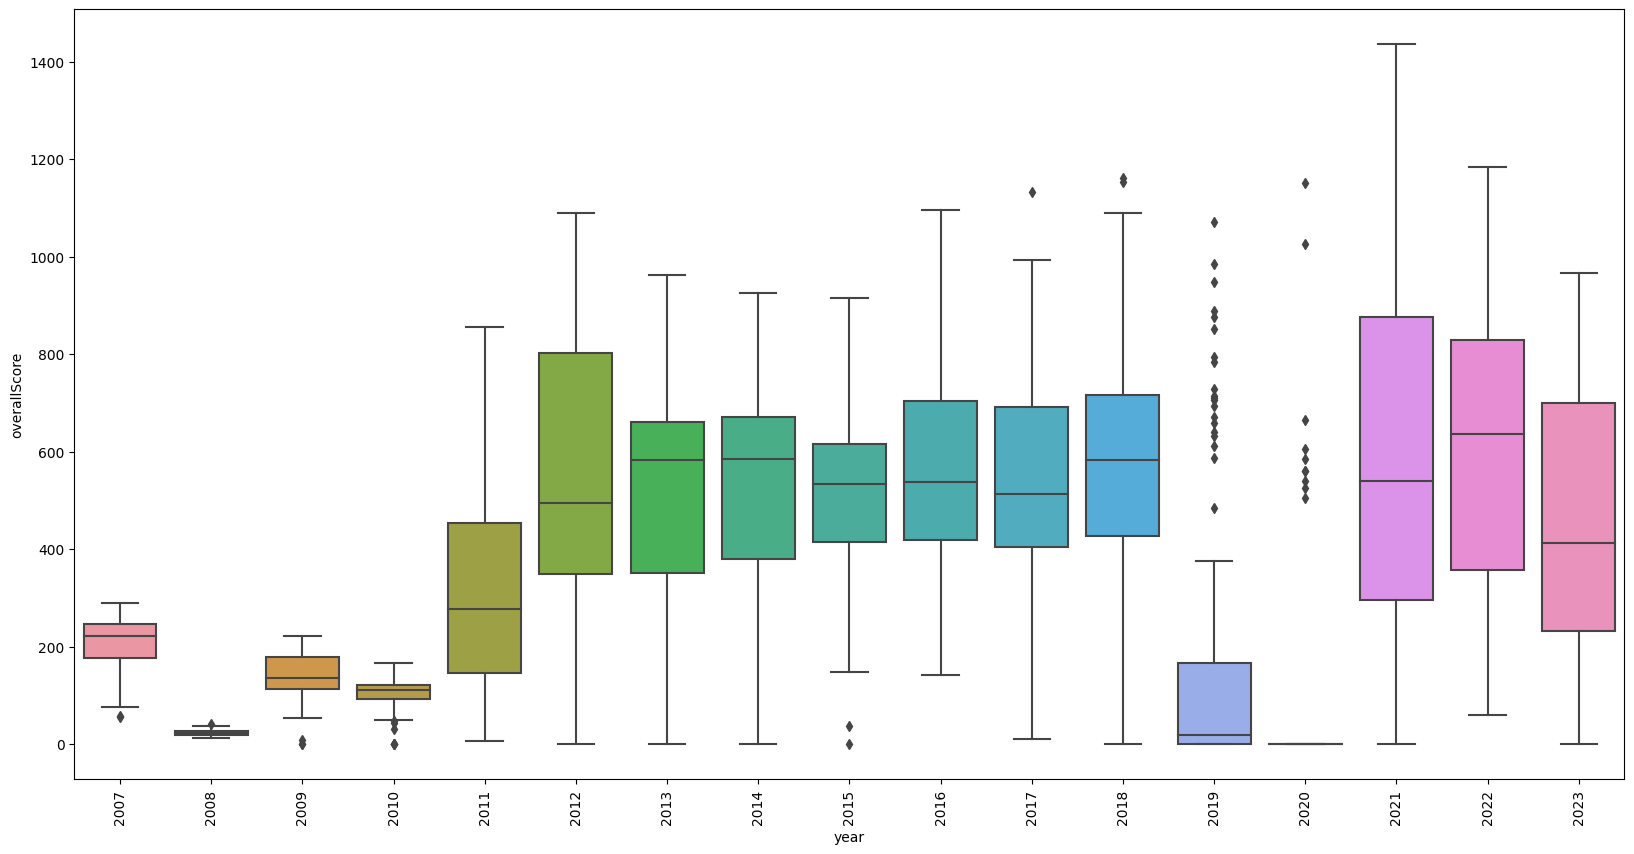

In [19]:
# Exploring the "overallScore" field in more details, which will be our prediction target
fig, ax = plt.subplots(ncols=1, figsize=(20,10))
sns.boxplot(y='overallScore', x='year', data=crossfit_data, ax=ax)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(20,10)
plt.show()

Few insights:
* Scoring system for years < 2011 is very different from the more recent years, which are using a larger scale
* 2019 & 2020 seem to be exceptions amongst years > 2010. We will discover more about those later on during EDA

# <b>3 <span style='color:#6588d8'>|</span><a id="eda"> EDA: Exploratory Data Analysis</a></b>
##    * <a id="target">Prediction Target</a>
For this analysis purpose, we will choose the field <b>"overallScore"</b> as the prediction target. As stated in the introduction, we would like to predict the rank of athletes based on a set of specific features.<br>
>We are <b>not directly using the "overallRank" field</b>, as it would be more complex during predictions to define all the rules linked to athletes ranking (based on the number of athletes, different ranking for men & women, ...)
>We will assign ranks based on this predicted score

In [20]:
# Selecting the set of features we'd like to keep for this EDA
updated_dataset = duckdb.sql("SELECT competitorId, genderId, age, height, weight, overallRank, overallScore, bmi, affiliateId, countryOfOriginCode, regionId, statusId, year, gamesCompetitions, openCompetitions FROM crossfit_data").df()
# Removing status not useful for our analysis, cf below in the "statusId" section for more details
updated_dataset = updated_dataset[(updated_dataset.statusId !=2) & (updated_dataset.statusId !=5)]

We will now explore how all features are related to each others.

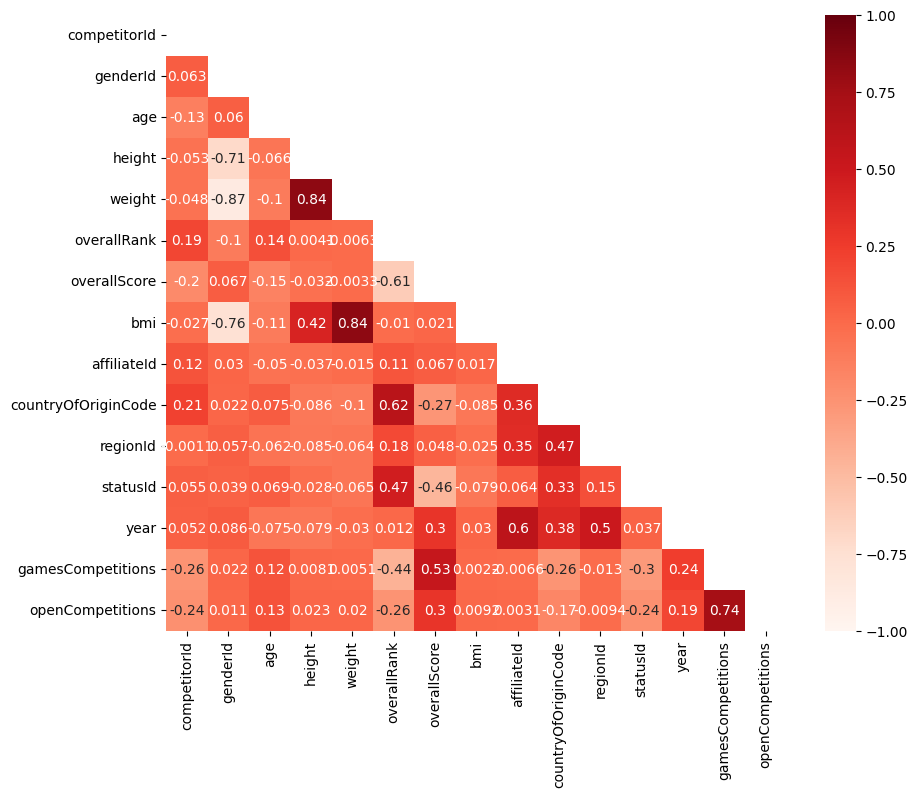

In [21]:
import numpy as np
# Let's see how our predictors are related to each others & our prediction target
# Computing correlation matrix
updated_dataset_corr = updated_dataset.corr()

# Generating a mask for the upper triangle - the matrix is symmetrical by definition, hence we don't need it. Cf: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
mask = np.triu(np.ones_like(updated_dataset_corr, dtype=bool))

# Creating the heatmap with the mask
sns.heatmap(updated_dataset_corr, annot=True, cmap='Reds', vmin=-1, vmax=1, mask=mask)
plt.gcf().set_size_inches(10,8)

A bunch of those results should not be surprising at all:
* BMI formula uses both height and weight. A correlation between those variables was expected.
* GenderId being negatively correlated to height, weight & bmi is also not surprising
* gamesCompetitions & openCompetitions being highly correlated makes sense, as you usually need to go through the Open before tackling the Games competitions
* affiliateId, countryOfOriginCode & regionId being correlated also makes sense, as usually the country/region of the athlete matches the one of the affiliate
* year
    * Year is correlated with overall score, as score system & scale differs across the years.
    * It is correlated with game/open competitions, as the max number of those can only increase if the year increases. 
    * It is also correlated with the affiliateId/country/region: as described within a chart further down in the notebook, proportion of US athletes is dropping YoY, introducing new countries/regions/affiliate.
* overallRank being negatively correlated to overallScore makes sense: the higher the score gets, the lower the rank should be. However, we might have expected a higher correlation.


Let's focus on the relationships of predictors with the target!

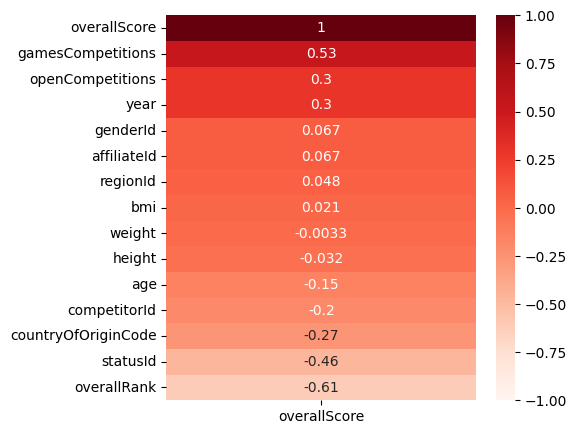

In [22]:
sns.heatmap(updated_dataset_corr[['overallScore']].sort_values(by='overallScore', ascending=False),annot=True, cmap='Reds', vmin=-1, vmax=1)
plt.gcf().set_size_inches(5,5)

### competitorId & gamesCompetitions
<br>The correlation here is certainly due to the fact that athletes will be more likely to score similarly throughout different years.
<br><br>Let's first understand better the spread of competitors throughout the measured period

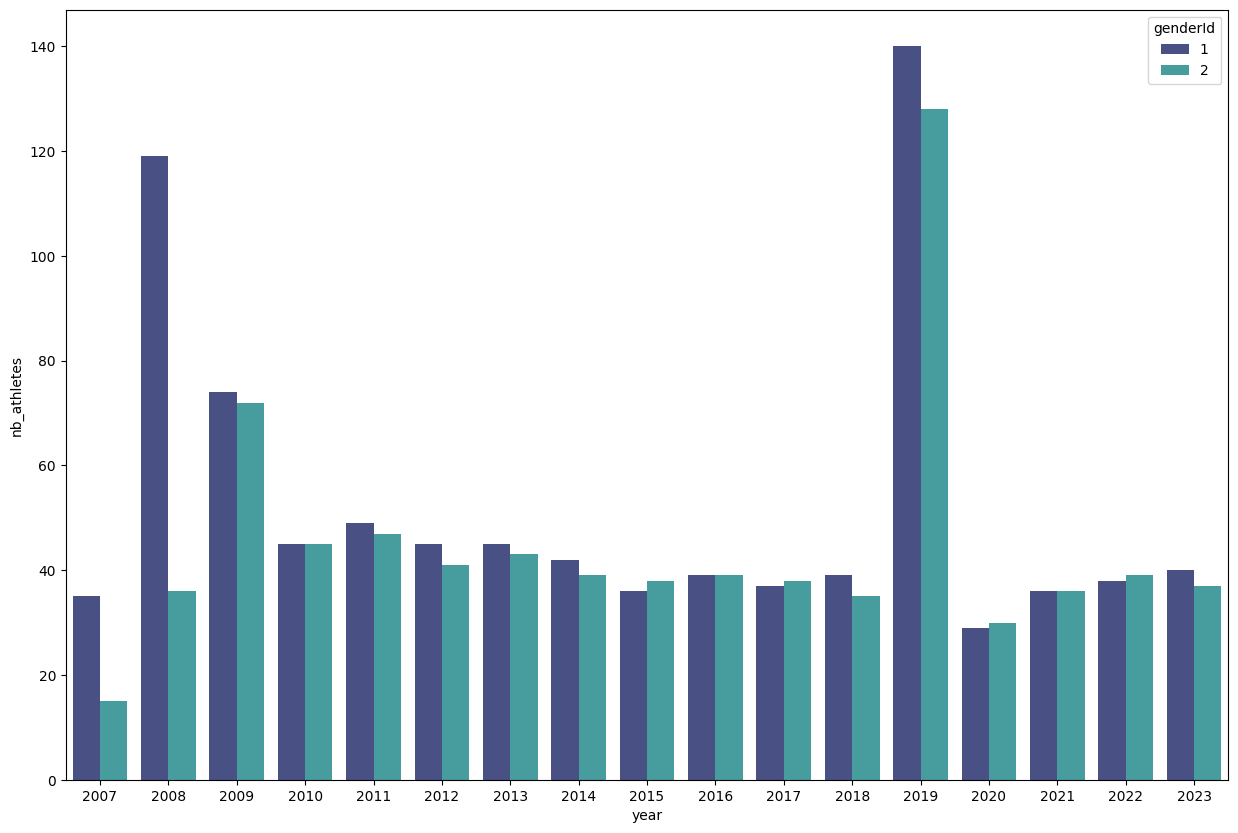

In [23]:
athletes_per_year = duckdb.sql("SELECT COUNT(DISTINCT competitorId) AS nb_athletes, year, genderId FROM updated_dataset GROUP BY year,genderId ORDER BY year ASC").df()

sns.barplot(data=athletes_per_year, x="year", y="nb_athletes", hue="genderId", palette="mako")
plt.gcf().set_size_inches(15,10)
# The bar chart is showing the number of men & women athletes for each measured year.
# 1 stands for Men, & 2 for Women

Few insights:
* 2007 & 2008 seemed to have a way higher proportion of male athletes
* The total number of athletes seems really high for 2019. It also looks pretty low for 2020.
    * For 2019, it could be explained by additional ways added to qualify to the Games, like the "Sanctionals". We will see later in this notebook that 2019 had the highest number of unique countries.
    * For 2020, it can be explained by Covid-19🦠. The format of the competition was very different, and the total number of participating athletes lower. (30 men & 30 women)

In [24]:
# As seen within the correlation matrix above, the gamesCompetitions feature is fairly correlated with the overallScore
# Before deep diving into it, it does not seem surprising: if our number of gamesCompetitions is rising, the overallScore should rise as well, as the athlete surely has more experience & training

duckdb.sql("SELECT gamesCompetitions, COUNT(DISTINCT competitorId) AS num_athletes FROM updated_dataset GROUP BY gamesCompetitions ORDER BY num_athletes DESC")

┌───────────────────┬──────────────┐
│ gamesCompetitions │ num_athletes │
│       int64       │    int64     │
├───────────────────┼──────────────┤
│                 1 │          784 │
│                 2 │          286 │
│                 3 │          155 │
│                 0 │          141 │
│                 4 │           89 │
│                 5 │           55 │
│                 6 │           36 │
│                 7 │           24 │
│                 8 │           14 │
│                 9 │           10 │
│                10 │            5 │
│                11 │            2 │
│                12 │            1 │
├───────────────────┴──────────────┤
│ 13 rows                2 columns │
└──────────────────────────────────┘

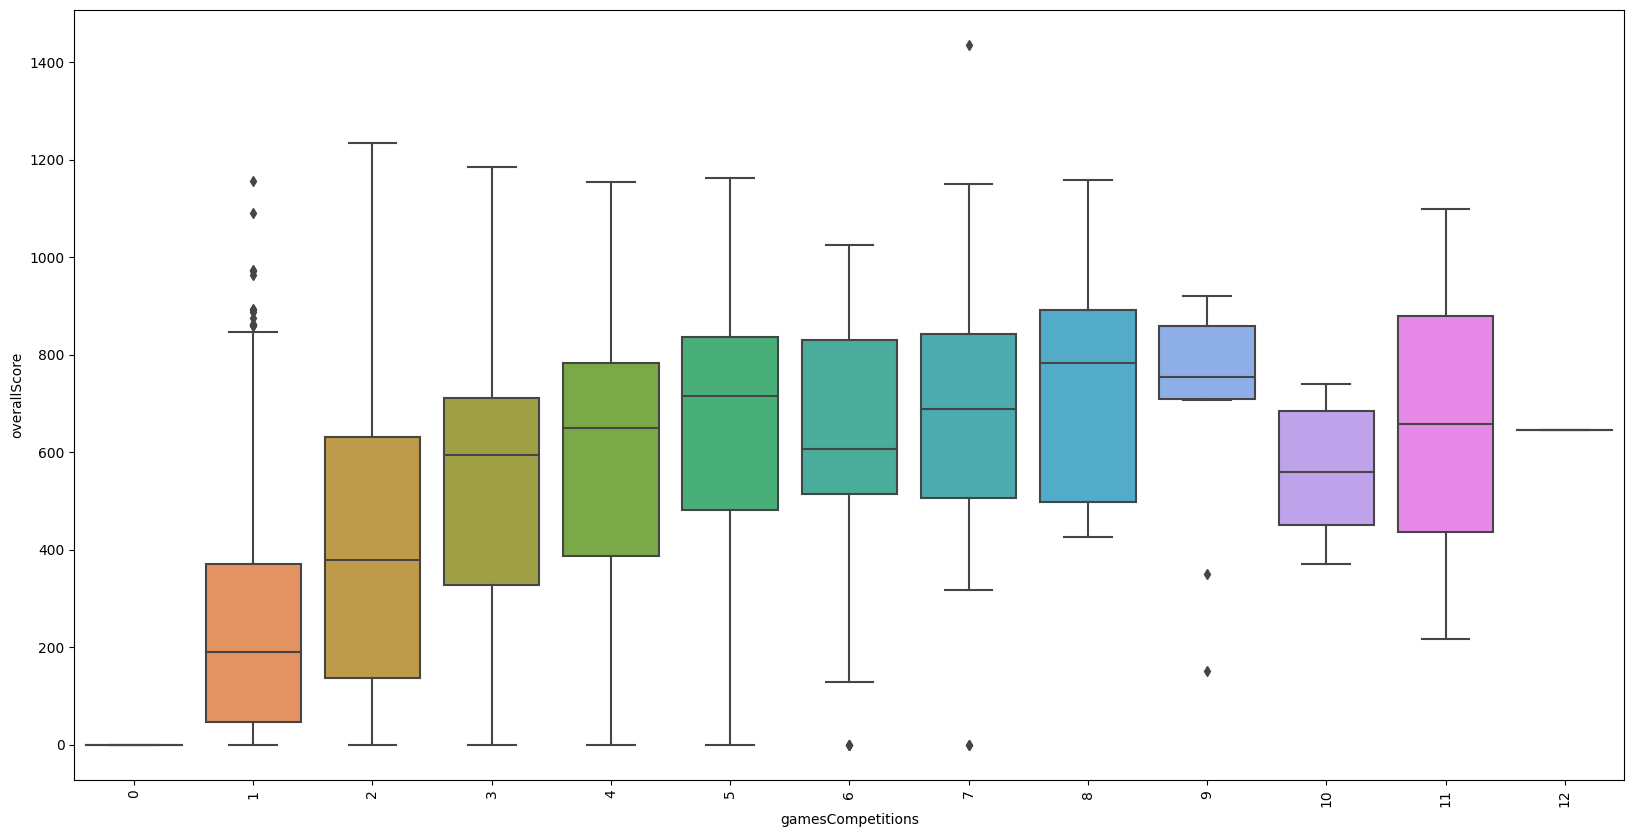

In [25]:
crossfit_data_filtered_compId = duckdb.sql("SELECT overallScore, year, gamesCompetitions FROM updated_dataset").df()

fig, ax = plt.subplots(ncols=1, figsize=(40,20))
sns.boxplot(y='overallScore', x='gamesCompetitions', data=crossfit_data_filtered_compId, ax=ax)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(20,10)
plt.show()

# Based on the below boxplot chart, we see a clear relationship between the number of games competitions and the overall score, which keeps increasing then stabilizing as the number of games goes up.

In [26]:
# We can see that 0 gamesCompetitions means a 0 overall score. How many athletes do we have in that scenario per year, and what was the best overall rank amongst them?
duckdb.sql("SELECT year, COUNT(DISTINCT competitorId)AS num_athletes, MIN(overallRank)AS best_rank FROM updated_dataset WHERE gamesCompetitions == 0 AND overallRank > 0 GROUP BY year ORDER BY num_athletes DESC")

┌───────┬──────────────┬───────────┐
│ year  │ num_athletes │ best_rank │
│ int64 │    int64     │   int64   │
├───────┼──────────────┼───────────┤
│  2019 │          117 │        74 │
│  2020 │           18 │        10 │
│  2010 │            4 │        42 │
│  2021 │            4 │        38 │
│  2009 │            2 │        71 │
│  2018 │            1 │        40 │
└───────┴──────────────┴───────────┘

### StatusId


In [27]:
# We will analyse the initial "crossfit_data" dataset, which still contains all the different statusId values.

duckdb.sql("SELECT statusId, status, COUNT(DISTINCT competitorId) AS num_athletes FROM crossfit_data GROUP BY statusId, status")
#@ Based on some research, below what seems to be the meaning of each status
#ACT assuming active, so none of the status mentioned below
#CUT for athletes being cut out of the competition, i.e eliminated during the several steps of the competition.
#WD for "Withdraw"
#DNF for "Did not finish"
#DQ for "Disqualified"

## Based on this, it seems relevant for this variable to be related to the overall score: an athlete being in a status other than ACT is less likely to be in the top first ranks & to have a high score.

┌──────────┬─────────┬──────────────┐
│ statusId │ status  │ num_athletes │
│  int64   │ varchar │    int64     │
├──────────┼─────────┼──────────────┤
│        2 │ WD      │           59 │
│        3 │ DNF     │           10 │
│        5 │ DQ      │            6 │
│        1 │ ACT     │          498 │
│        4 │ CUT     │          587 │
└──────────┴─────────┴──────────────┘

As you might guess, we don't need the WD (withdraw) nor DQ (disqualified) status. We will keep DNF, ACT and CUT as they are part of the competitions & of the prediction analysis we will conduct further down in this notebook.

### affiliateId

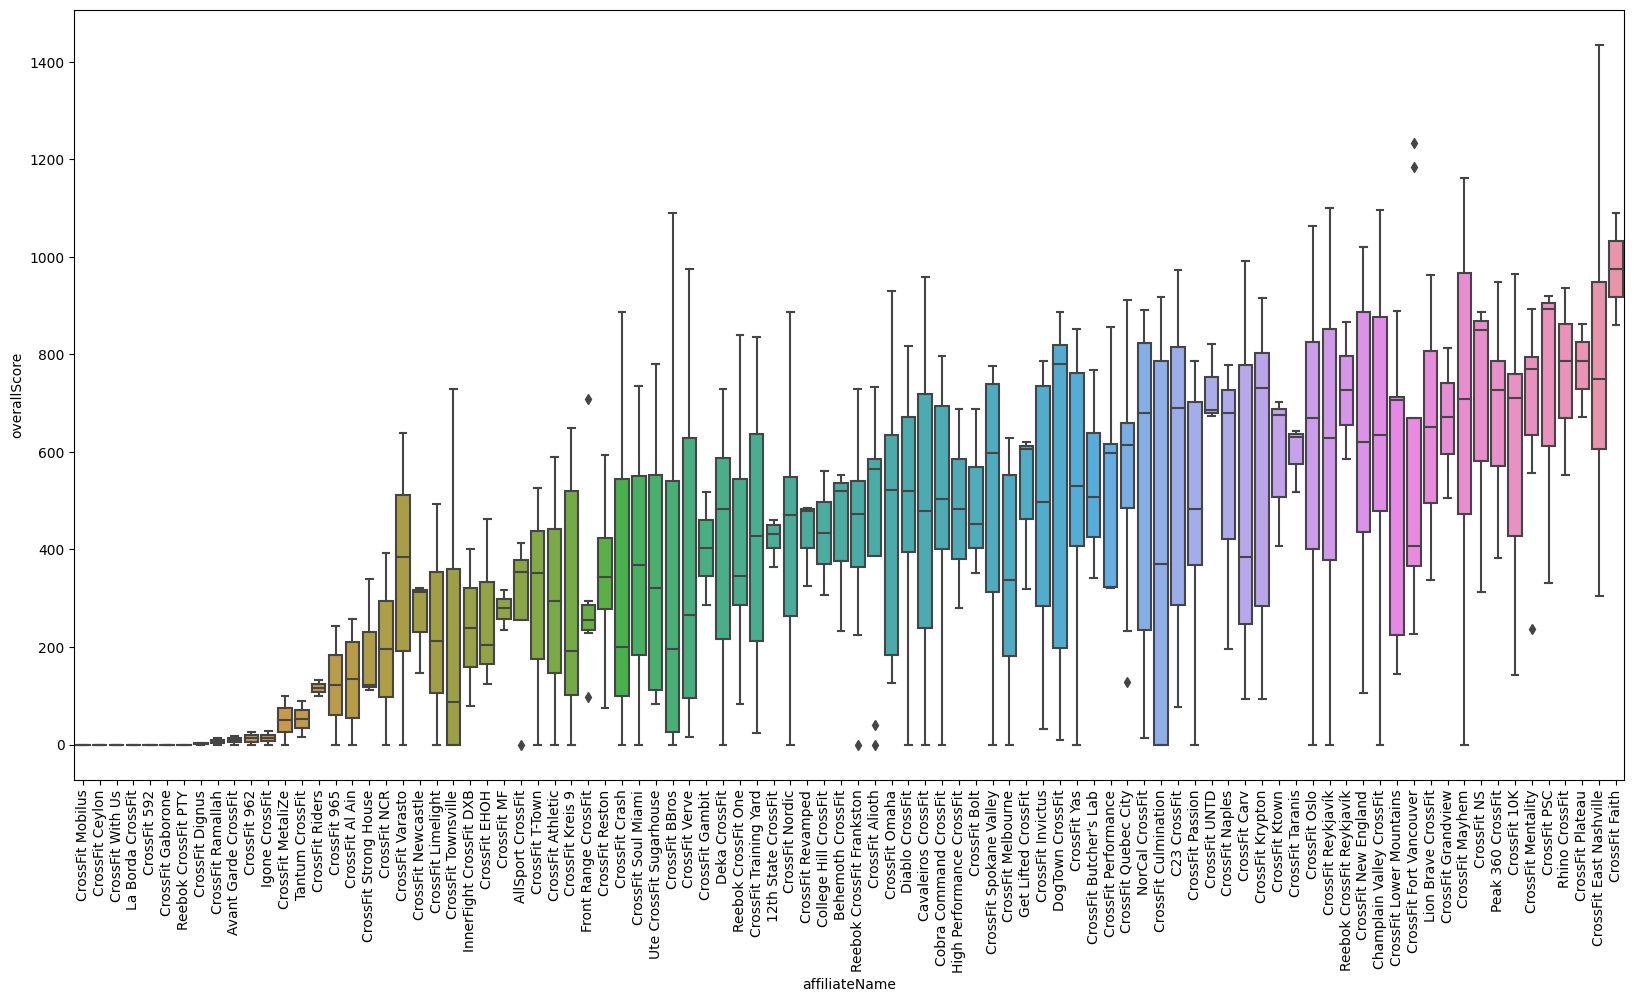

affiliateName
CrossFit Faith             974.5
CrossFit PSC               893.0
CrossFit NS                850.0
CrossFit Plateau           787.0
Rhino CrossFit             786.0
DogTown CrossFit           780.0
CrossFit Mentality         770.0
CrossFit East Nashville    750.0
CrossFit Krypton           730.0
Peak 360 CrossFit          727.0
Name: overallScore, dtype: float64


In [28]:
# We will investigate the correlation if we focus on affiliates having at least 2 athletes participating in the Games.
crossfit_data_filtered_afId = duckdb.sql("""
WITH affiliate_multi_athletes AS 
    (SELECT affiliateId, 
            COUNT(DISTINCT competitorId)AS nb_athletes, 
            AVG(overallScore)AS avg_score 
    FROM updated_dataset 
    GROUP BY affiliateId 
    HAVING nb_athletes > 1) 
SELECT affiliateName, 
       overallScore 
FROM crossfit_data as cd 
RIGHT JOIN affiliate_multi_athletes AS ama ON cd.affiliateId = ama.affiliateId 
ORDER BY avg_score ASC
""").df()
                                         
fig, ax = plt.subplots(ncols=1, figsize=(40,20))
sns.boxplot(y='overallScore', x='affiliateName', data=crossfit_data_filtered_afId, ax=ax)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(20,10)
plt.show()

# The boxplot chart below shows affiliate with at least 2 distinct athletes that participated in the Games throughout the measured years. It is ordered based on the average score across those athletes, per affiliate.
# We see a relationship of affiliate with the overall score, with some affiliate having very different spread & median values.

## Extract the median values
medians = crossfit_data_filtered_afId.groupby(['affiliateName'])['overallScore'].median().sort_values(ascending=False).head(10)
print(medians)
# We can see here the best affiliates in terms of median overall score from their athletes

### age

age_group_divisions
18-34    290.0
16-17    237.0
50-54    185.0
45-49    140.0
35-39    131.0
40-44     36.0
14-15      NaN
55-59      NaN
60-64      NaN
65+        NaN
Name: overallScore, dtype: float64


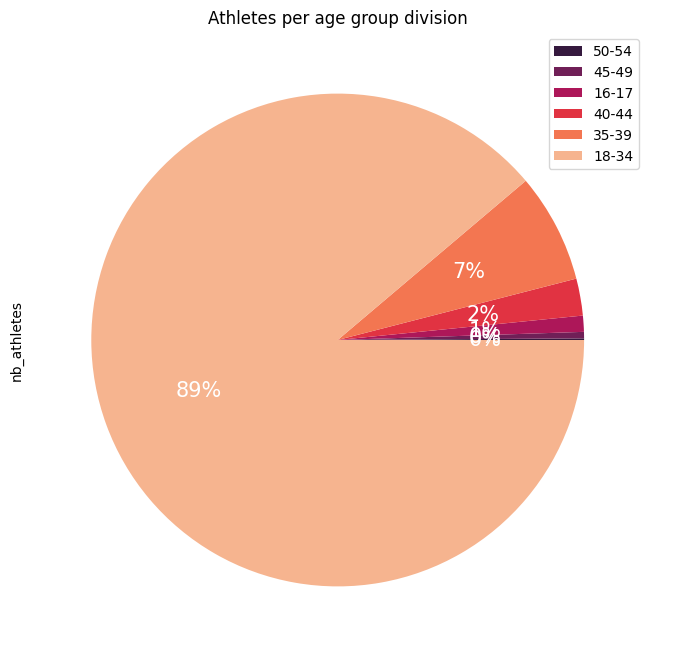

In [29]:
# Setting the same age groups as the 2023 Crossfit game age group divisions
bin_edges= [13, 15, 17, 34, 39, 44, 49, 54, 59, 64, np.inf]
bin_labels= ["14-15", "16-17", "18-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65+"]
ageGroup_updated_dataset = updated_dataset.copy()
ageGroup_updated_dataset['age_group_divisions'] = pd.cut(ageGroup_updated_dataset['age'], bins=bin_edges, labels=bin_labels)

## Let's see how many athletes we have in each age group divisions
pie_data = duckdb.sql("SELECT COUNT(DISTINCT competitorId)AS nb_athletes, age_group_divisions FROM ageGroup_updated_dataset GROUP BY age_group_divisions ORDER BY nb_athletes").df()
colors = sns.color_palette("rocket", n_colors=len(pie_data))

plot = pie_data.plot.pie(y='nb_athletes', labels=pie_data["age_group_divisions"],colors=colors, title="Athletes per age group division",fontsize=15,autopct='%1.0f%%',figsize=(8, 8), textprops={'color':'white'})

# We can see that most athletes at the Games competitions are in the 18-34 age bracket.

## Extract the median values
medians_age_score = ageGroup_updated_dataset.groupby(['age_group_divisions'])['overallScore'].median().sort_values(ascending=False).head(10)
print(medians_age_score)

# We have a negative correlation between age & overall score.

### countryOfOriginCode

<br>-->What is the country of origin of most athletes participating in the Games? how the country of origin affects the overall score?

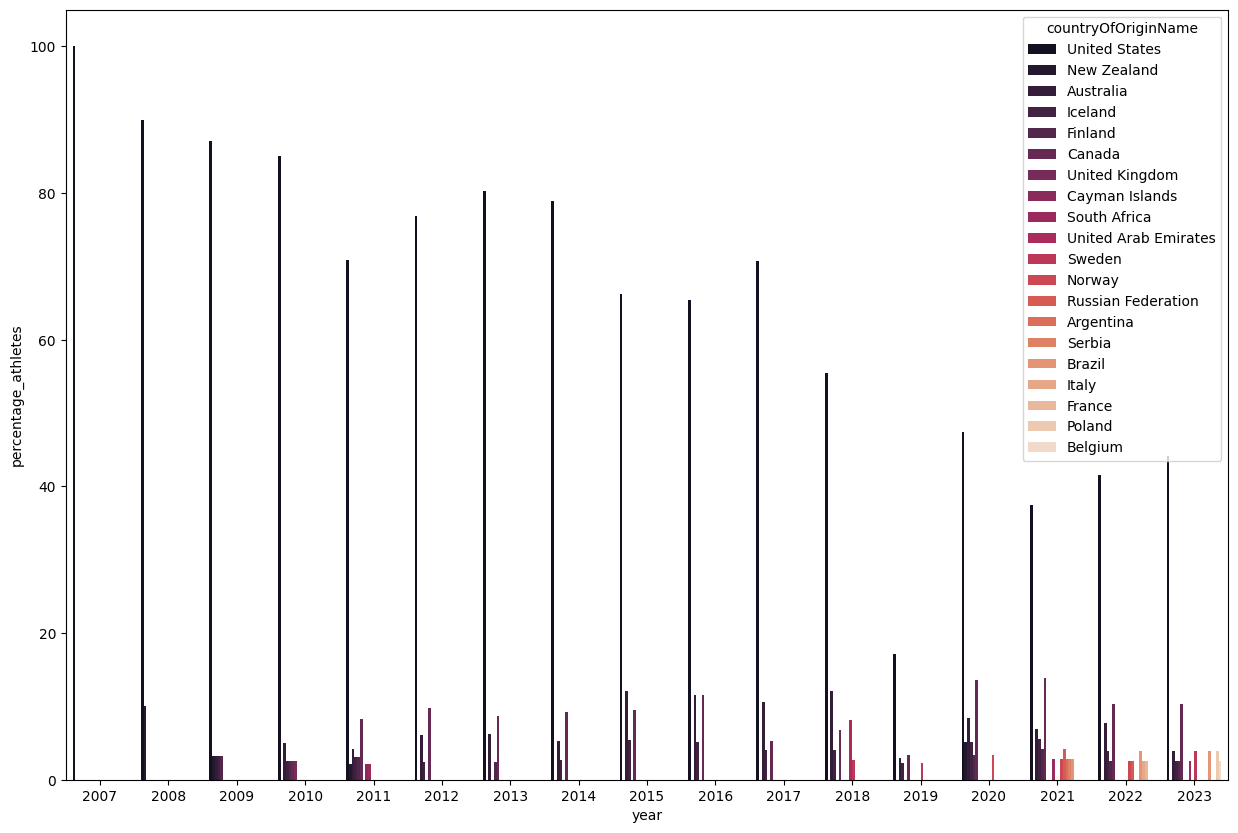

In [30]:
# What is the country of origin of most athletes participating in the Games?
# Computing the % per year, for each country, of the number of competing athletes. Removing all countries with less than 2% of the total competing athletes.
# Removed all empty values prior to computing the %, so it can render better on the chart
nb_athletes_per_country = duckdb.sql("""
WITH core_query AS 
    (SELECT countryOfOriginCode, 
            year, 
            (COUNT(DISTINCT competitorId)*100.0)/SUM(COUNT(DISTINCT CompetitorId)) 
     OVER (PARTITION BY year) AS percentage_athletes 
     FROM updated_dataset 
     WHERE countryOfOriginCode !=0 
     GROUP BY countryOfOriginCode, year 
     ORDER BY year DESC) 
SELECT cq.*, 
       cf.countryOfOriginName 
FROM core_query AS cq 
LEFT JOIN crossfit_data AS cf ON cq.countryOfOriginCode = cf.countryOfOriginCode 
WHERE cq.percentage_athletes >= 2 
ORDER BY cq.year, cq.percentage_athletes DESC
""").df()

sns.barplot(data=nb_athletes_per_country, x="year", y="percentage_athletes", hue="countryOfOriginName", palette="rocket")
plt.gcf().set_size_inches(15,10)

# Data prior to 2012 had a lot of empty values, so result on the chart for those years need to be analysed appropriately.

Few insights here:
<br> -->Most athletes are coming from the US, but the trend is declining, which can surely be explained by Crossfit gaining popularity around the world. 
<br> -->We can notice that 2019 had the least % of US athletes. It can be explained by some changes in the Games qualification. We will investigate below the number of unique participating countries per year.

In [31]:
duckdb.sql("SELECT year, COUNT(DISTINCT countryOfOriginCode)AS nb_countries FROM updated_dataset GROUP BY year ORDER BY nb_countries DESC")

# It is clear that 2019 was the year with the highest number of different countries, which explains why the % of US athlete is way lower than all the other years from the measured period. This is linked to the regional "Sanctionals", locally held competitions that could lead to Games participation.
# We can also see that it kept growing steadily over the years.

┌───────┬──────────────┐
│ year  │ nb_countries │
│ int64 │    int64     │
├───────┼──────────────┤
│  2019 │          114 │
│  2022 │           25 │
│  2023 │           25 │
│  2021 │           21 │
│  2020 │           15 │
│  2018 │           14 │
│  2011 │           12 │
│  2017 │           11 │
│  2016 │            9 │
│  2012 │            9 │
│  2015 │            9 │
│  2014 │            8 │
│  2013 │            7 │
│  2010 │            7 │
│  2009 │            6 │
│  2008 │            3 │
│  2007 │            2 │
├───────┴──────────────┤
│ 17 rows    2 columns │
└──────────────────────┘

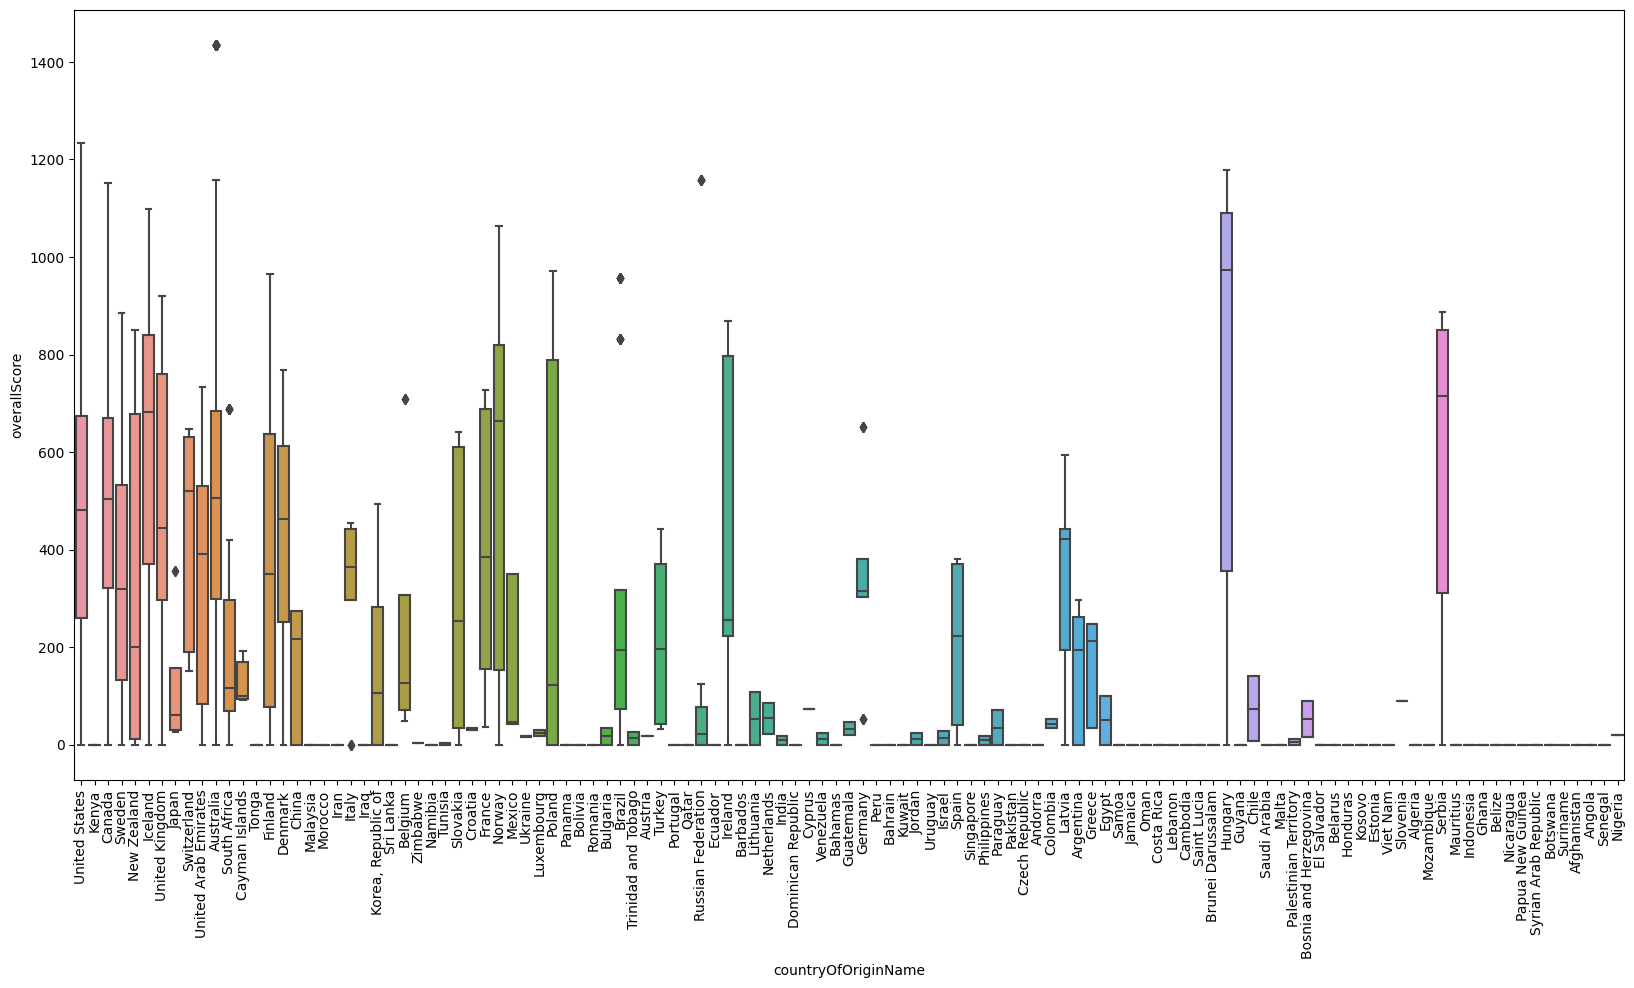

In [32]:
## How the country of origin affects the overall score?
countryName_updated_dataset = duckdb.sql("""
SELECT ud.overallScore, 
       cf.countryOfOriginName 
FROM updated_dataset AS ud 
LEFT JOIN crossfit_data AS cf ON ud.countryOfOriginCode = cf.countryOfOriginCode
""").df()

fig, ax = plt.subplots(ncols=1, figsize=(20,10))
sns.boxplot(y='overallScore', x='countryOfOriginName', data=countryName_updated_dataset, ax=ax)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(20,10)
plt.show()

# Based on the boxplots below, while the country of origin does not have a strong relationship with the overall score, we can still see few countries with very different median values. We will print the median values to show the top countries of origin in terms of overall score.

In [33]:
## Extract the median values
medians = countryName_updated_dataset.groupby(['countryOfOriginName'])['overallScore'].median().sort_values(ascending=False).head(10)
print(medians)
# We can see here the best countries in terms of median overall score from their athletes

countryOfOriginName
Hungary           973.5
Serbia            716.0
Iceland           682.0
Norway            663.0
Switzerland       520.5
Australia         507.0
Canada            505.0
United States     482.0
Denmark           462.0
United Kingdom    445.0
Name: overallScore, dtype: float64


##    * <a id="feature">Features Selection</a>

In [34]:
## Beware! We need to avoid doing any data leakage here!
# We need to be cautious of avoiding leaking future information into past data. For example, predictions for 2010 Games ranks using 2011 athletes performance during the Games. This data wouldn't be available at the time we are doing the prediction for.
## We will solve this issue by time splitting our data, between training & validation:
# Training will be made of data from year < 2020
# Validation will be made of data from year >= 2020

## Divide data into training and validation subsets
from sklearn.model_selection import train_test_split

# Training data: years 2007-2019
train = updated_dataset[updated_dataset['year'] < 2020]
# Removing the prediction target, but also overallRank, which is directly linked to it, and could introduce data leakage.
X_train = train.drop(columns=['overallScore','overallRank'], axis=1)
y_train = train['overallScore']

# Testing data: years 2020-2023
test = updated_dataset[updated_dataset['year'] >= 2020]
# Removing the prediction target, but also overallRank, which is directly linked to it, and could introduce data leakage.
X_test = test.drop(columns=['overallScore','overallRank'], axis=1)
y_test = test['overallScore']

X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1361 entries, 0 to 1708
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   competitorId         1361 non-null   int64  
 1   genderId             1361 non-null   int64  
 2   age                  1361 non-null   int64  
 3   height               1361 non-null   float64
 4   weight               1361 non-null   float64
 5   bmi                  1361 non-null   float64
 6   affiliateId          1361 non-null   int64  
 7   countryOfOriginCode  1361 non-null   int64  
 8   regionId             1361 non-null   int64  
 9   statusId             1361 non-null   int64  
 10  year                 1361 non-null   int64  
 11  gamesCompetitions    1361 non-null   int64  
 12  openCompetitions     1361 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 148.9 KB
<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 7 to 1635
Data columns (total 13 colu

# <b>4 <span style='color:#6588d8'>|</span><a id="modelling"> Modelling</a></b>

In [35]:
## Defining the model
# We will choose a random forest regressor model, as we have a small dataset, and for the sake of simplicity in regards to the fine tuning of the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Let's define a simple python function to try out different random forest parameters, and select the ones that yield the best results, i.e the lowest MAE (mean absolute error)
def scoring_mae(n_estimators):
    """
    Training the random forest regressor model based on the number of estimators given to the function.
    The model is then used to make predictions, and computing the mean absolute error, to measure how effective our predictions were on the validation dataset.
    """
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
    # Training the data
    model.fit(X_train, y_train)
    # Predicting
    crossfit_score_preds = model.predict(X_test)
    # Evaluating
    score = mean_absolute_error(y_test, crossfit_score_preds)
    return score

In [36]:
estimators = [i*25 for i in range(1, 100)]
dict_scores = {f"n_estimators: {i}":scoring_mae(i) for i in estimators}

lowest_mae = min(dict_scores.items(), key=lambda x: x[1])
print(lowest_mae)

# Extracting the key which has the format "n_estimators: {i}"
key = lowest_mae[0]
# Parsing the key to get the 'i' value
i_value = int(key.split()[-1])
print(i_value)

('n_estimators: 1750', 228.4770125313283)
1750


The mean absolute error is <b>~228</b>, meaning a mean error of ~228 points for the athletes' score in the predictions compared to actual values
* We want <b>to predict the rank</b>, not the actual score itself
* The score will help us assigning "predicted_rank" to the athletes from the predicted years, and then comparing with the actual "overallRank".
* We are doing so to avoid directly predicting the "overallRank" using the standard random forest regression model, which wouldn't make sense based on how ranks are being assigned, or would require complex additional steps. (cf requirements listed in the code cell below)

### Predicting athletes ranks for 2020 to 2023 Games
* Adding our "predicted_score" as a new field, based on the optimised model parameters previously identified
* Assigning "predicted_rank" based on the "predicted_score" field, according to the specific ranking requirements mentioned in the code cell
* Comparing "predicted_rank" with the actual "overallRank" to measure how well the model performed on the predicted years (2020 to 2023)

In [37]:
## Running the model using the parameter yielding the lowest MAE seen above
model = RandomForestRegressor(n_estimators=i_value, random_state=0)
# Training the data
model.fit(X_train, y_train)
# Predicting
crossfit_score_preds = model.predict(X_test)

test['predicted_score'] = crossfit_score_preds

# Assigning "predicted_rank" based on "predicted_score". We will do this using SQL windows functions.
# Our requirements are: ranks must be integers, men & women must be ranked separately, for each measured years.
test_predicted_rank = duckdb.sql("""
SELECT competitorId, genderId, year, overallRank, overallScore, predicted_score, RANK()
OVER(
    PARTITION BY year, genderId
    ORDER BY predicted_score DESC
    ) AS predicted_rank
FROM test
ORDER BY year, genderId,  predicted_rank ASC
""").df()
print(test_predicted_rank.head(5))

# Calculating the absolute error between "predicted_rank" and "overallRank"
test_predicted_rank['error_abs_rank'] = abs(test_predicted_rank['overallRank'] - test_predicted_rank['predicted_rank'])

   competitorId  genderId  year  overallRank  overallScore  predicted_score  \
0        153604         1  2020            1          1150       867.283429   
1         81616         1  2020            8             0       824.732000   
2        173837         1  2020            7             0       768.246286   
3        199938         1  2020           12             0       745.014857   
4        153625         1  2020           20             0       738.750857   

   predicted_rank  
0               1  
1               2  
2               3  
3               4  
4               5  


/tmp/ipykernel_20/2150836350.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_score'] = crossfit_score_preds


Let's visualise those predictions:

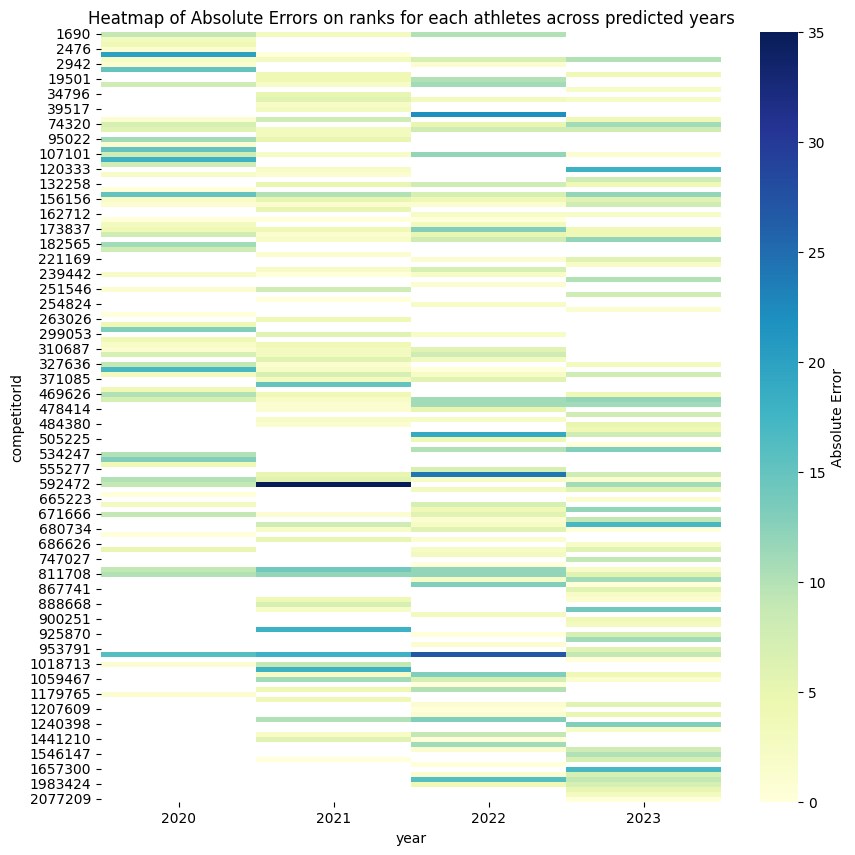

In [38]:
# Pivoting the data to create a matrix format suitable for heatmap
error_matrix = test_predicted_rank.pivot_table(index='competitorId', columns='year', values='error_abs_rank')

# Plotting the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(error_matrix, cmap='YlGnBu', annot=False, fmt=".1f", cbar_kws={'label': 'Absolute Error'})
plt.title('Heatmap of Absolute Errors on ranks for each athletes across predicted years')
plt.show()

In [39]:
# Let's compute & print the MAE for each measured years
def maePerYear(year):
    new_test = test_predicted_rank[test_predicted_rank.year == year]
    return new_test['error_abs_rank'].mean()

year_list = [2020, 2021, 2022, 2023]
mae_list = [maePerYear(y) for y in year_list]
print(f"MAE for predicted years, from 2020 to 2023: {mae_list}")
print(f"Average MAE across all predicted years, from 2020 to 2023: {sum(mae_list)/len(mae_list)}")

MAE for predicted years, from 2020 to 2023: [6.372881355932203, 5.111111111111111, 6.064935064935065, 6.376623376623376]
Average MAE across all predicted years, from 2020 to 2023: 5.981387727150439


In [40]:
# Let's compare those MAE with the max rank seen for each of those predicted years, so we know how far off in % we were
duckdb.sql("""
SELECT year, MAX(overallRank)AS max_rank, AVG(error_abs_rank)AS mae, ROUND(((mae/max_rank)*100))AS percent_error
FROM test_predicted_rank 
GROUP BY year
ORDER BY year ASC
""")

┌───────┬──────────┬───────────────────┬───────────────┐
│ year  │ max_rank │        mae        │ percent_error │
│ int64 │  int64   │      double       │    double     │
├───────┼──────────┼───────────────────┼───────────────┤
│  2020 │       30 │ 6.372881355932203 │          21.0 │
│  2021 │       40 │ 5.111111111111111 │          13.0 │
│  2022 │       39 │ 6.064935064935065 │          16.0 │
│  2023 │       40 │ 6.376623376623376 │          16.0 │
└───────┴──────────┴───────────────────┴───────────────┘

# <b>5 <span style='color:#6588d8'>|</span><a id="next"> Next Steps</a></b>

We can definitely do better with the predictions, by using additional relevant data sources, which might influence the overall rank of those athletes.
<br>
Some ideas:
<br>
* Fetching the detailed results from the Open, Quarterfinals and Semifinals for each athletes on Crossfit benchmark WODs (Fran, Helen, ...) & exercices (HSPU, Wall ball, Snatch, Deadlift, Muscle up, ...)
* Fetching additional details about the Affiliate: since when has it been opened, what is the overall experience of the coaches, number of active members, ...
* Fetching additional details about athletes themselves: when did they start Crossfit, are they doing any other sport-related activity on a regular basis, how often do they train, their nutrition plan, ...

Thanks for going through this analysis, please feel free to share any comments/if you spot an error and ideas for other Crossfit-related analysis!

![](https://images.unsplash.com/photo-1578762560042-46ad127c95ea?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2940&q=80)